<a href="https://colab.research.google.com/github/sureshakukkaje/Text-Analytics/blob/master/Sentiment_Detection_using_TweetSent_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Sentiment Detection using TweetSent Dataset***

# Import Packages & Libraries

In [0]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline
import re

In [0]:
# print many statemetns at same time using the below command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

# Import & Read Data

In [0]:
train  = pd.read_csv('TweetSent.csv', encoding = "utf8")

In [206]:
no_records1 = len(train)
print(no_records1)

5968


In [207]:
train.head()

Tweet  Category
0                                      Not Available  negative
1  IOS 9 App Transport Security. Mm need to check...   neutral
2  Mar if you have an iOS device, you should down...   neutral
3  @jimmie_vanagon my phone does not run on lates...  negative
4  Not sure how to start your publication on iOS?...  positive

In [208]:
train.describe()

Tweet  Category
count            5968      5968
unique           5418         4
top     Not Available  positive
freq              546      2888

# **Text Pre-Processing**

In [209]:
train[train['Category'] == 'positive'].head(5)

Tweet  Category
4   Not sure how to start your publication on iOS?...  positive
10  Parkrun app for iOS downloaded Where have you ...  positive
11  Today @YouTubeGaming launches, with apps for i...  positive
12  Got a project you want to work on? Need help w...  positive
13  Met with iOS Developer today. We may have a "g...  positive

In [210]:
train[train['Category'] == 'negative'].head(5)

Tweet  Category
0                                       Not Available  negative
3   @jimmie_vanagon my phone does not run on lates...  negative
29  @_tomcc @bartwerf please stop walking and work...  negative
36  @DeltaAssist yes, I asked an attendant to prin...  negative
78                                      Not Available  negative

In [211]:
train[train['Category'] == 'neutral'].head(5)

Tweet Category
1  IOS 9 App Transport Security. Mm need to check...  neutral
2  Mar if you have an iOS device, you should down...  neutral
5  Two Dollar Tuesday is here with Forklift 2, Qu...  neutral
6  If you're not already signed up to test my iOS...  neutral
7  YouTube Gaming Officially Launches On Web, And...  neutral

In [212]:
train.shape

(5968, 2)

In [213]:
train["Category"].value_counts()

positive    2888
neutral     2123
negative     956
Tweet          1
Name: Category, dtype: int64

# **Distribution of Length of Tweets**

(array([5.470e+02, 0.000e+00, 1.000e+01, 3.600e+01, 5.600e+01, 1.240e+02,
        1.820e+02, 2.170e+02, 2.830e+02, 3.600e+02, 3.880e+02, 4.860e+02,
        5.410e+02, 1.351e+03, 1.360e+03, 2.600e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  8.  ,  17.15,  26.3 ,  35.45,  44.6 ,  53.75,  62.9 ,  72.05,
         81.2 ,  90.35,  99.5 , 108.65, 117.8 , 126.95, 136.1 , 145.25,
        154.4 , 163.55, 172.7 , 181.85, 191.  ]),
 <a list of 20 Patch objects>)

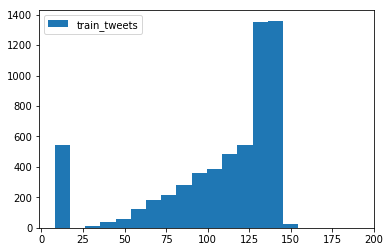

In [214]:
length_train = train['Tweet'].str.len()

plt.hist(length_train, bins=20, label="train_tweets")
plt.legend()
plt.show()

# **Data Cleaning**

In [0]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

# **Removing Twitter Handles (@user)**

In [0]:
train['tidy_tweet'] = np.vectorize(remove_pattern)(train['Tweet'], "@[\w]*") 

In [217]:
train.head()

Tweet  ...                                         tidy_tweet
0                                      Not Available  ...                                      Not Available
1  IOS 9 App Transport Security. Mm need to check...  ...  IOS 9 App Transport Security. Mm need to check...
2  Mar if you have an iOS device, you should down...  ...  Mar if you have an iOS device, you should down...
3  @jimmie_vanagon my phone does not run on lates...  ...   my phone does not run on latest IOS which may...
4  Not sure how to start your publication on iOS?...  ...  Not sure how to start your publication on iOS?...

[5 rows x 3 columns]

# **Removing Punctuations, Numbers and Special Characters**

In [218]:
train['tidy_tweet'] = train['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
train.head(10)

Tweet  ...                                         tidy_tweet
0                                      Not Available  ...                                      Not Available
1  IOS 9 App Transport Security. Mm need to check...  ...  IOS   App Transport Security  Mm need to check...
2  Mar if you have an iOS device, you should down...  ...  Mar if you have an iOS device  you should down...
3  @jimmie_vanagon my phone does not run on lates...  ...   my phone does not run on latest IOS which may...
4  Not sure how to start your publication on iOS?...  ...  Not sure how to start your publication on iOS ...
5  Two Dollar Tuesday is here with Forklift 2, Qu...  ...  Two Dollar Tuesday is here with Forklift    Qu...
6  If you're not already signed up to test my iOS...  ...  If you re not already signed up to test my iOS...
7  YouTube Gaming Officially Launches On Web, And...  ...  YouTube Gaming Officially Launches On Web  And...
8  YouTube Gaming Launches Tomorrow with iOS and ...  ...  YouTube Gaming Launches Tomorrow with iOS and ...
9  @astrill Yashan from BBC @bbcchinese the VPN a...  ...   Yashan from BBC  the VPN access on IOS may be...

[10 rows x 3 columns]

# **Removing Short Words**

In [0]:
train['tidy_tweet'] = train['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [220]:
train.head()

Tweet  ...                                         tidy_tweet
0                                      Not Available  ...                                          Available
1  IOS 9 App Transport Security. Mm need to check...  ...  Transport Security need check party network su...
2  Mar if you have an iOS device, you should down...  ...              have device should download http uDnD
3  @jimmie_vanagon my phone does not run on lates...  ...  phone does latest which account problem other ...
4  Not sure how to start your publication on iOS?...  ...  sure start your publication live helping with ...

[5 rows x 3 columns]

# **Text Normalization**

In [0]:
tokenized_tweet = train['tidy_tweet'].apply(lambda x: x.split()) # tokenizing

In [222]:
tokenized_tweet.head()

0                                          [Available]
1    [Transport, Security, need, check, party, netw...
2         [have, device, should, download, http, uDnD]
3    [phone, does, latest, which, account, problem,...
4    [sure, start, your, publication, live, helping...
Name: tidy_tweet, dtype: object

In [0]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [0]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
train['tidy_tweet'] = tokenized_tweet

# **Word Cloud**

<Figure size 720x504 with 0 Axes>

(-0.5, 799.5, 499.5, -0.5)

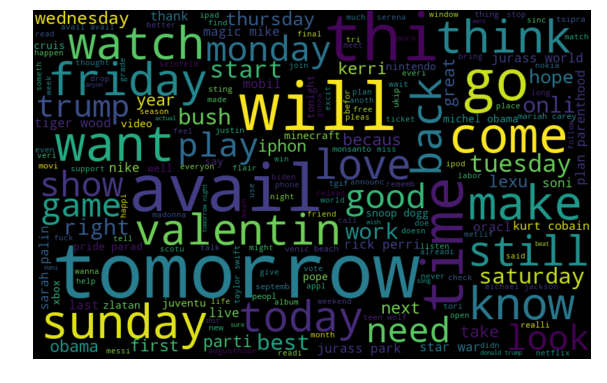

In [225]:
all_words = ' '.join([text for text in train['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Positive Words

<Figure size 720x504 with 0 Axes>

(-0.5, 799.5, 499.5, -0.5)

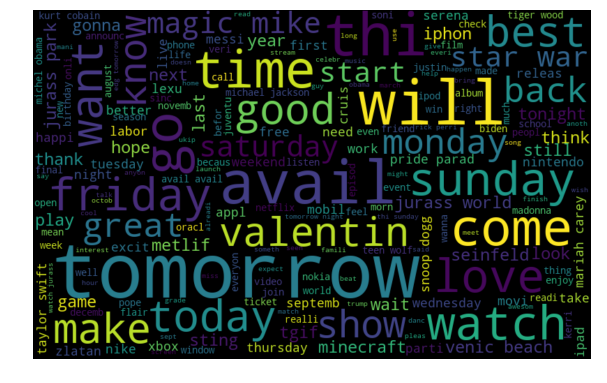

In [226]:
positive_words =' '.join([text for text in train['tidy_tweet'][train['Category'] == 'positive']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Neutral Words

<Figure size 720x504 with 0 Axes>

(-0.5, 799.5, 499.5, -0.5)

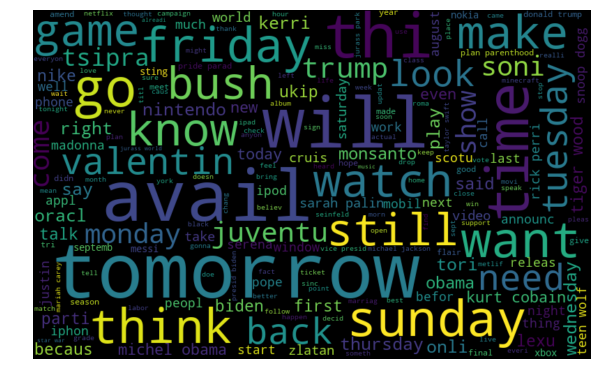

In [227]:
neutral_words =' '.join([text for text in train['tidy_tweet'][train['Category'] == 'neutral']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neutral_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Negative Words

<Figure size 720x504 with 0 Axes>

(-0.5, 799.5, 499.5, -0.5)

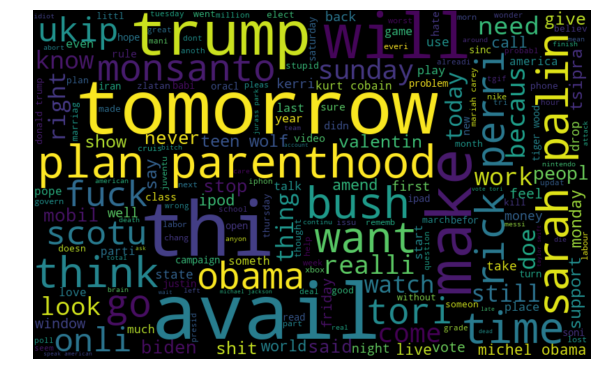

In [228]:
negative_words =' '.join([text for text in train['tidy_tweet'][train['Category'] == 'negative']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# **Understanding the Impact of Hashtags on Tweets Sentiment**

In [0]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [0]:
# extracting hashtags from positive,negative and neutral tweets

HT_positive = hashtag_extract(train['tidy_tweet'][train['Category'] == 'positive'])
HT_neutral = hashtag_extract(train['tidy_tweet'][train['Category'] == 'neutral'])
HT_negative = hashtag_extract(train['tidy_tweet'][train['Category'] == 'negative'])

# unnesting list
HT_positive = sum(HT_positive,[])
HT_neutral = sum(HT_neutral,[])
HT_negative = sum(HT_negative,[])

# **Postive Tweets**

<Figure size 1440x360 with 0 Axes>

[Text(0, 0.5, 'Count')]

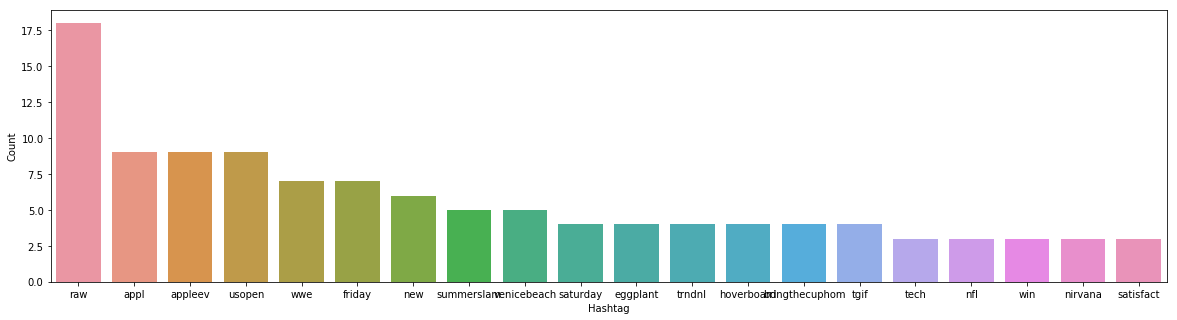

In [231]:
a = nltk.FreqDist(HT_positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(20,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

# **Neutral Tweets**

<Figure size 1440x360 with 0 Axes>

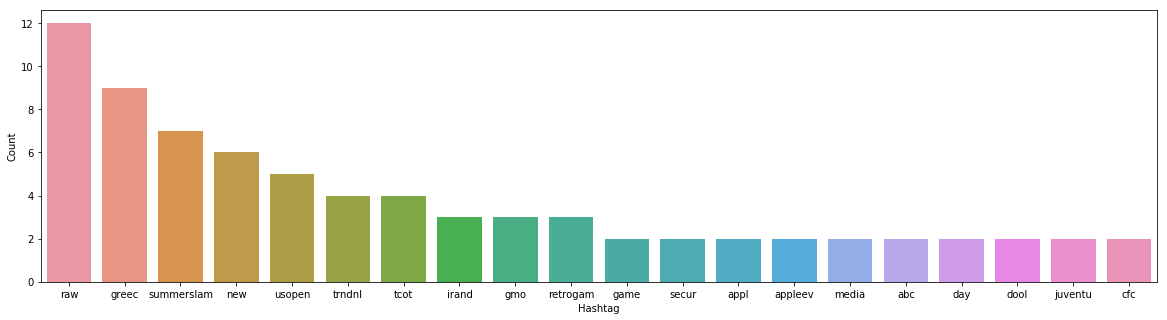

In [232]:
b = nltk.FreqDist(HT_neutral)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})

# selecting top 20 most frequent hashtags
e = e.nlargest(columns="Count", n = 20)   
plt.figure(figsize=(20,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")

# **Negative Tweets**

<Figure size 1440x360 with 0 Axes>

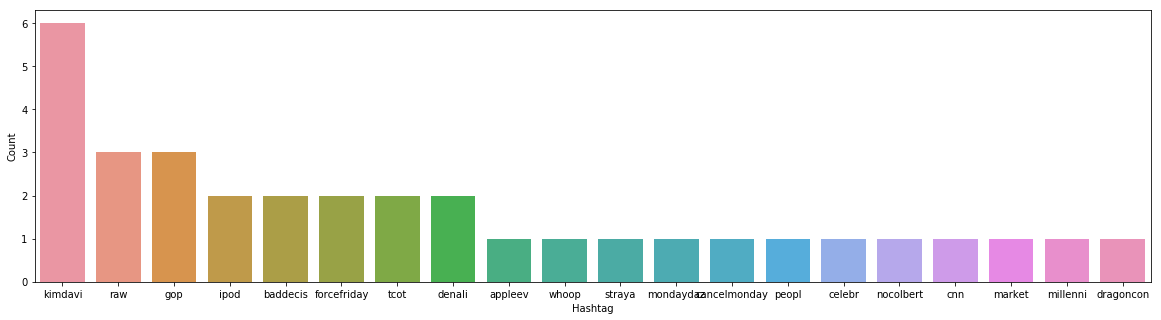

In [233]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})

# selecting top 20 most frequent hashtags
e = e.nlargest(columns="Count", n = 20)   
plt.figure(figsize=(20,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")

# **Extracting Features from Cleaned Tweets**

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

# **Bag Of Words Features**

In [235]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(train['tidy_tweet'])
bow.shape

(5968, 1000)

# **Word Embeddings**

In [236]:
tokenized_tweet = train['tidy_tweet'].apply(lambda x: x.split()) # tokenizing

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['tidy_tweet']), epochs=20)

(964776, 1223060)

# **Preparing Vectors for Tweets**

In [0]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

# Word2Vec Feature Set

In [238]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(5968, 200)

# **Doc2Vec Embedding**

In [0]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import LabeledSentence

In [0]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

In [0]:
labeled_tweets = add_label(tokenized_tweet) # label all the tweet

In [242]:
labeled_tweets[:6]

[LabeledSentence(words=['avail'], tags=['tweet_0']),
 LabeledSentence(words=['transport', 'secur', 'need', 'check', 'parti', 'network', 'support', 'http', 'fmtcfuadgj'], tags=['tweet_1']),
 LabeledSentence(words=['have', 'devic', 'should', 'download', 'http', 'udnd'], tags=['tweet_2']),
 LabeledSentence(words=['phone', 'doe', 'latest', 'which', 'account', 'problem', 'other', 'time', 'replac'], tags=['tweet_3']),
 LabeledSentence(words=['sure', 'start', 'your', 'public', 'live', 'help', 'with', 'anyth', 'session', 'today', 'friday', 'http', 'kpqqgjjh'], tags=['tweet_4']),
 LabeledSentence(words=['dollar', 'tuesday', 'here', 'with', 'forklift', 'quickkey', 'suit', 'page', 'just', 'today', 'http', 'bnmfoeacw'], tags=['tweet_5'])]

# **Model Building**

# **Lexicon-based using Bag Of Words**

In [0]:
lex_file = open("AFINN-111.csv")

In [244]:
no_records = len(tokenized_tweet)
print(no_records)

5968


In [245]:
word_list = []
print(word_list)
for  record in train['tidy_tweet']:
    print("record")
    print(record)
    print("tokens")
    tokens = record.split()
    print(tokens)
    words = []
    for word in tokens:
        words.append(word.lower())
        print(words)
    
    word_list.append(words)
print("word_list")
print(word_list)


[]
record
avail
tokens
['avail']
['avail']
record
transport secur need check parti network support http fmtcfuadgj
tokens
['transport', 'secur', 'need', 'check', 'parti', 'network', 'support', 'http', 'fmtcfuadgj']
['transport']
['transport', 'secur']
['transport', 'secur', 'need']
['transport', 'secur', 'need', 'check']
['transport', 'secur', 'need', 'check', 'parti']
['transport', 'secur', 'need', 'check', 'parti', 'network']
['transport', 'secur', 'need', 'check', 'parti', 'network', 'support']
['transport', 'secur', 'need', 'check', 'parti', 'network', 'support', 'http']
['transport', 'secur', 'need', 'check', 'parti', 'network', 'support', 'http', 'fmtcfuadgj']
record
have devic should download http udnd
tokens
['have', 'devic', 'should', 'download', 'http', 'udnd']
['have']
['have', 'devic']
['have', 'devic', 'should']
['have', 'devic', 'should', 'download']
['have', 'devic', 'should', 'download', 'http']
['have', 'devic', 'should', 'download', 'http', 'udnd']
record
phone doe la

In [247]:
lexicons = {}
records = lex_file.readlines()
for record in records:
    print(record) # line contains newline charecter
    print(record.rstrip('\n').split(",")) # to remove new line charecter
    lexicons[record.rstrip('\n').split(",")[0]] = int(record.rstrip('\n').split(",")[1])
print(lexicons)
lexicons["abandon"]

t,2

['t', '2']
self-deluded,-2

['self-deluded', '-2']
selfish,-3

['selfish', '-3']
selfishness,-3

['selfishness', '-3']
sentence,-2

['sentence', '-2']
sentenced,-2

['sentenced', '-2']
sentences,-2

['sentences', '-2']
sentencing,-2

['sentencing', '-2']
serene,2

['serene', '2']
severe,-2

['severe', '-2']
sexy,3

['sexy', '3']
shaky,-2

['shaky', '-2']
shame,-2

['shame', '-2']
shamed,-2

['shamed', '-2']
shameful,-2

['shameful', '-2']
share,1

['share', '1']
shared,1

['shared', '1']
shares,1

['shares', '1']
shattered,-2

['shattered', '-2']
shit,-4

['shit', '-4']
shithead,-4

['shithead', '-4']
shitty,-3

['shitty', '-3']
shock,-2

['shock', '-2']
shocked,-2

['shocked', '-2']
shocking,-2

['shocking', '-2']
shocks,-2

['shocks', '-2']
shoot,-1

['shoot', '-1']
short-sighted,-2

['short-sighted', '-2']
short-sightedness,-2

['short-sightedness', '-2']
shortage,-2

['shortage', '-2']
shortages,-2

['shortages', '-2']
shrew,-4

['shrew', '-4']
shy,-1

['shy', '-1']
sick,-2

[

KeyError: ignored

In [248]:
#For each tweet
#For each word in tweet
#Get the word score (score is a numbe rif the word is in Lexicon, 0 if not)
#Add all the scores and find the ploarity
strength = []
for tweet in word_list:
    score = 0
    for word in tweet:
        if word in (lexicons):
            score = score + lexicons[word]
    strength.append(score)
print(strength)

[0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, -1, 0, 0, 0, 0, -2, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -4, 0, 0, 0, 0, 2, 0, 0, 1, 0, -1, 0, 0, 0, 0, -2, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, -4, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, -2, 2, 0, 1, 0, 0, -2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, -1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, -4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2, 0, 0, 1, 0, 0, 0, 0, -2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -4, 1, 4, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [0]:
#n = len(word_list)
#for index in range(n):
    #print(word_list[index], strength[index])
#Add a new list with polarity and a list score
import pandas as pd
#dir(pd)

In [0]:
senti_matrix = pd.DataFrame(strength, train['tidy_tweet'])

In [251]:
senti_matrix[0:]

0
tidy_tweet                                           
avail                                               0
transport secur need check parti network suppor...  2
have devic should download http udnd                0
phone doe latest which account problem other ti...  0
sure start your public live help with anyth ses...  0
dollar tuesday here with forklift quickkey suit...  0
alreadi sign test game now your chanc http ezhi...  0
youtub game offici launch android august youtub...  0
youtub game launch tomorrow with android app he...  0
yashan from access limit dure china militari pa...  0
parkrun download where have been befor great ea...  0
today launch with app android devic here what n...  0
project want work need help with swift need exc...  3
with develop today have                             0
#crossskyhigh go #saturday thi http #indiedev h...  0
what best audio record from parti devic jailbre...  0
five great free app game august edit that time ...  0
look interest alway end back keyboard alway gli...  0
news through eye real peopl your report with fr...  0
siri know about #appl event #giveusahint http s...  0
readi build tomorrow might last build till come     0
been mani year have hundr photo album onli appe...  0
beat android have fairli decent                     0
even though there other differ featur thi still...  0
huawei watch order suggest android wear come ip...  1
speedenew rumor android wear will soon work wit...  0
over here near rhode island need lyft know down...  0
wish that customfoldericon work receiv decemb       1
today check ipod which upgrad further randomli ...  0
pleas stop walk work have more than month late ... -1
...                                                ..
anyway tell zlatan center team like tell center...  0
more day till start campaign that will scudetto...  0
franc refere union laurent said accept zlatan a...  0
avail                                               0
supposedli pull pedro deal zlatan becom avail p...  0
zlatan will your perfum make perform overhead k...  0
full shit they tri replac zlatan with neymar ha... -4
reserv right milan zlatan arriv                     0
zlatan simpli save himself                          0
zlatan avail reason well worth go immedi solut      2
have slimmest chanc enough time rather griezman...  0
striker world sale coach handl zlatan               0
would love have cavani over shawdow play fiddl ...  0
didn think they will sell either mayb rabiot su...  1
mourinho zlatan seri winner loser from draw thu...  4
avail                                               0
zlatan wear sunglass eye harm                       0
want austin obvious prefer zlatan muller lewand...  1
held talk with thursday zlatan name confirm thi...  0
avail                                               0
zlatan look mighti attract moment doesn striker...  0
wonder zlatan will unit player come tuesday nig...  0
today unit should have done better refere didn ...  0
there silver line thi show dont anyon tuesday f...  0
wenger pari could cavani zlatan then again fami...  0
thi zlatan greizmann laport tomorrow make happen    0
goal level zlatan friday post everi other #dsg ...  0
wouldn surpris enquir happi play fiddl zlatan w...  2
injuri zlatan against russia blow miss austria ...  0
noooooo hope zlatan be zlatan tuesday well stil...  0

[5968 rows x 1 columns]

# **Naive Bayes Classifier**

In [0]:
train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

In [0]:
# splitting data into training and validation set
from sklearn.model_selection import train_test_split
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['Category'],
                                                          random_state=42,
                                                          test_size=0.25)

In [254]:
from sklearn.naive_bayes import MultinomialNB
clf= MultinomialNB()
clf.fit(xtrain_bow, ytrain)

score = clf.score(xvalid_bow, yvalid)
score

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

0.5676943699731903

# K-Means Clustering

In [255]:
from sklearn.cluster import MiniBatchKMeans

num_clusters = 5
kmeans_model = MiniBatchKMeans(n_clusters=num_clusters, init='k-means++', n_init=1, 
                         init_size=1000, batch_size=1000, verbose=False, max_iter=1000)
kmeans = kmeans_model.fit(xtrain_bow)
kmeans_clusters = kmeans.predict(xtrain_bow)
kmeans_distances = kmeans.transform(xtrain_bow)
sorted_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
print(kmeans_clusters)
print(kmeans)

for i in range(num_clusters):
    print("Cluster %d:" % i)
    for j in sorted_centroids[i, :5]:
        print(' %s' % [j])
    print()
    
prediction = kmeans.predict(xvalid_bow)
prediction

[1 4 1 ... 1 1 0]
MiniBatchKMeans(batch_size=1000, compute_labels=True, init='k-means++',
                init_size=1000, max_iter=1000, max_no_improvement=10,
                n_clusters=5, n_init=1, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=False)
Cluster 0:
 [456]
 [980]
 [617]
 [886]
 [955]

Cluster 1:
 [409]
 [886]
 [57]
 [457]
 [870]

Cluster 2:
 [494]
 [409]
 [407]
 [457]
 [870]

Cluster 3:
 [798]
 [506]
 [955]
 [409]
 [857]

Cluster 4:
 [409]
 [870]
 [841]
 [661]
 [886]



array([4, 1, 1, ..., 1, 1, 1], dtype=int32)